In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dfx = pd.read_csv('Diabetes_XTrain.csv')
dfy = pd.read_csv('Diabetes_YTrain.csv')
dft = pd.read_csv('Diabetes_Xtest.csv')

In [4]:
x_train = dfx.values
y_train = dfy.values.reshape((-1))
x_test = dft.values
#print(X_train)
print(y_train.shape)
print(x_test.shape)

(576,)
(192, 8)


[[  0   1]
 [375 201]]


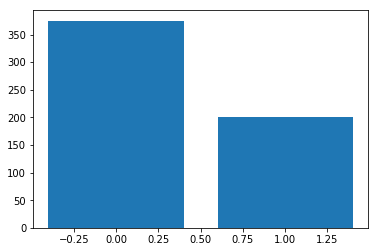

In [5]:
a = np.array(np.unique(y_train, return_counts = True))
print(a)
plt.bar(a[0], a[1])
plt.show()



In [30]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(X, Y, query_x, k = 24):
    vals = []
    m = X.shape[0]
    for i in range(m):
        d = dist(query_x, X[i])
        vals.append((d, Y[i]))
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:, 1], return_counts = True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred


In [31]:
m = x_test.shape[0]
ar = []
for i in range(m):
    pred = knn(x_train, y_train, x_test[i])
    ar.append(pred)
    #arr = np.array(ar)
    #arr = arr.reshape((-1))
print(ar)   

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]


In [32]:
arr = np.array(ar)
print(arr.shape)

(192,)


In [33]:
df = pd.DataFrame(arr)
df.columns = ['y']
df.to_csv('submission_diabetes.csv', encoding = 'utf-8', index = False)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors = 300)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [42]:
arr = np.array(pred)

In [43]:
df = pd.DataFrame(arr)
df.columns = ['y']
df.to_csv('submission_diabetes.csv', encoding = 'utf-8', index = False)